In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///F:/water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
df.shape

(3276, 10)

In [4]:
df.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

In [5]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
df.describe().corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.996760 -0.347547     1.000000  0.985515   
Hardness         0.996760  1.000000 -0.278088     0.996691  0.995782   
Solids          -0.347547 -0.278088  1.000000    -0.348399 -0.209896   
Chloramines      1.000000  0.996691 -0.348399     1.000000  0.985380   
Sulfate          0.985515  0.995782 -0.209896     0.985380  1.000000   
Conductivity     0.982005  0.993815 -0.176646     0.981842  0.998931   
Organic_carbon   0.999996  0.996973 -0.345046     0.999993  0.985953   
Trihalomethanes  0.999535  0.998709 -0.320243     0.999507  0.989931   
Turbidity        0.999996  0.996543 -0.350057     0.999998  0.985090   
Potability       0.999992  0.996427 -0.351188     0.999995  0.984848   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.982005        0.999996         0.999535   0.999996   
Hardness             0.993815        0.996973         0.998709   0.996543   
Solids              -0.176646       -0.345046        -0.320243  -0.350057   
Chloramines          0.981842        0.999993         0.999507   0.999998   
Sulfate              0.998931        0.985953         0.989931   0.985090   
Conductivity         1.000000        0.982519         0.987120   0.981510   
Organic_carbon       0.982519        1.000000         0.999613   0.999985   
Trihalomethanes      0.987120        0.999613         1.000000   0.999447   
Turbidity            0.981510        0.999985         0.999447   1.000000   
Potability           0.981245        0.999977         0.999402   0.999999   

                 Potability  
ph                 0.999992  
Hardness           0.996427  
Solids            -0.351188  
Chloramines        0.999995  
Sulfate            0.984848  
Conductivity       0.981245  
Organic_carbon     0.999977  
Trihalomethanes    0.999402  
Turbidity          0.999999  
Potability         1.000000

In [7]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [9]:
df.value_counts()

ph         Hardness    Solids        Chloramines  Sulfate     Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability
0.227499   152.530111  39028.599340  3.462492     283.693782  443.029232    13.201943       62.322711        3.545741   1             1
7.702183   192.137531  18126.030963  9.154581     364.191227  646.732599    14.376337       90.527536        4.382159   1             1
7.726135   233.947864  21667.868741  6.313182     340.273171  472.258994    14.399860       36.578038        3.720637   0             1
7.725333   252.265491  36477.738112  8.386761     426.543590  339.411327    17.485844       60.483885        3.724837   0             1
7.721078   208.438593  17248.618742  7.685370     286.403522  269.013635    11.757348       56.884528        3.223951   1             1
                                                                                                                                     ..
6.444555   166.635180  24855.830042  9.492361     287

In [10]:
df.var()

ph                 2.541855e+00
Hardness           1.081079e+03
Solids             7.688783e+07
Chloramines        2.506158e+00
Sulfate            1.715355e+03
Conductivity       6.532529e+03
Organic_carbon     1.094394e+01
Trihalomethanes    2.616309e+02
Turbidity          6.089967e-01
Potability         2.379968e-01
dtype: float64

In [11]:
df.max()

ph                    14.000000
Hardness             323.124000
Solids             61227.196008
Chloramines           13.127000
Sulfate              481.030642
Conductivity         753.342620
Organic_carbon        28.300000
Trihalomethanes      124.000000
Turbidity              6.739000
Potability             1.000000
dtype: float64

In [12]:
df.min()

ph                   0.000000
Hardness            47.432000
Solids             320.942611
Chloramines          0.352000
Sulfate            129.000000
Conductivity       181.483754
Organic_carbon       2.200000
Trihalomethanes      0.738000
Turbidity            1.450000
Potability           0.000000
dtype: float64

In [13]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [14]:
df=df.fillna(0)

In [15]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

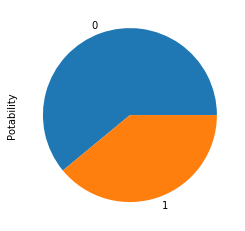

In [17]:
df.Potability.value_counts().plot(kind='pie')

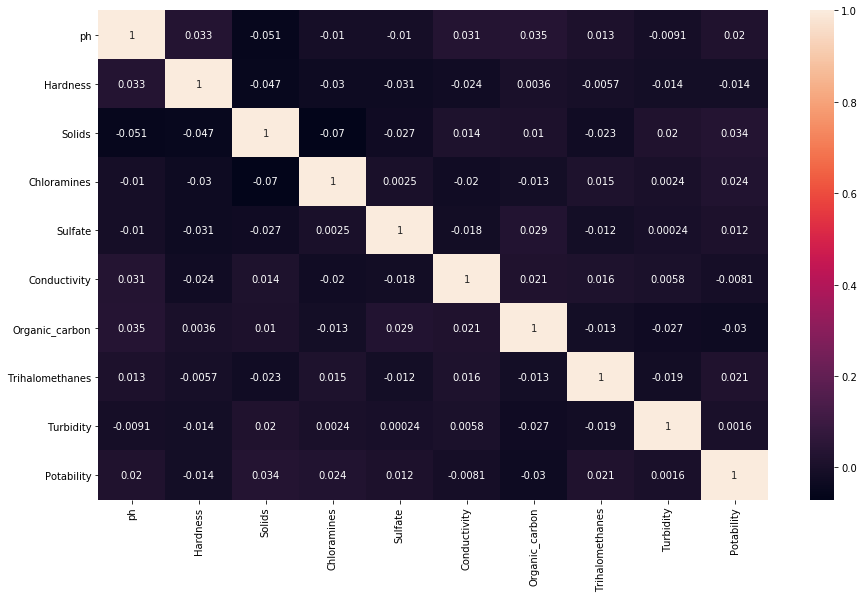

In [19]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

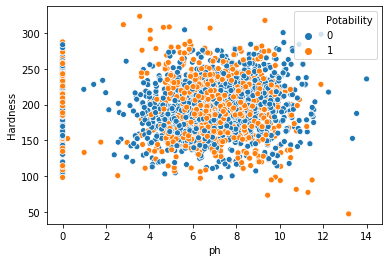

In [20]:
sns.scatterplot(x=df["ph"], y=df["Hardness"], hue=df.Potability,
data=df)

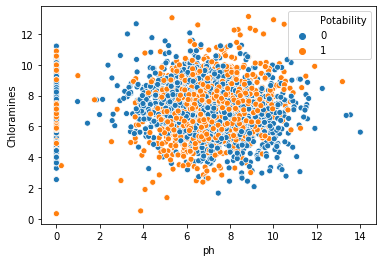

In [21]:
sns.scatterplot(x=df["ph"], y=df["Chloramines"], hue=df.Potability,
data=df)

In [22]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Trihalomethanes    0.021094
ph                 0.020390
Hardness           0.013837
Sulfate            0.011542
Conductivity       0.008128
Turbidity          0.001581
Name: Potability, dtype: float64

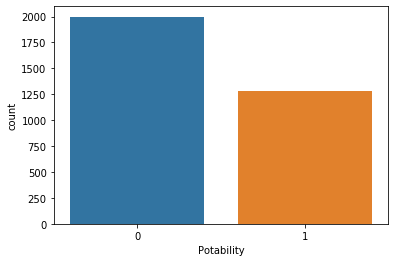

In [23]:
sns.countplot(df['Potability'])

In [29]:
x = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

In [31]:
print((xtrain))

            ph    Hardness        Solids  Chloramines     Sulfate  \
2128  5.514748  228.735924  35343.628580     4.346608    0.000000   
1519  0.000000  210.732854  13671.416030     8.546187  418.470551   
40    0.000000  233.858996  11703.923907     4.599388  309.039320   
1151  4.303575  227.007086   7323.302301     7.490508  326.695199   
2404  9.624727  217.372780  25175.754158     9.883946  329.174454   
...        ...         ...           ...          ...         ...   
835   7.440825  183.362713  17259.852302     4.610245  335.626443   
3264  5.893103  239.269481  20526.666156     6.349561  341.256362   
1653  6.648005  191.841801  15176.290678     5.661663    0.000000   
2607  7.675914  233.300759  23673.100606     8.407497    0.000000   
2732  0.000000  160.915815  13943.244974     8.399730  380.768478   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
2128    526.112381       14.930982        46.780508   2.798158  
1519    352.252328       10.353659       

In [32]:
print(len(xtest))
print(len(xtrain))
print(len(ytest))
print(len(ytrain))

656
2620
656
2620


In [33]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

59.14634146341463

In [34]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       412
           1       0.45      0.44      0.44       244

    accuracy                           0.59       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.59      0.59       656



In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rdf=RandomForestClassifier()
rdf.fit(xtrain,ytrain)
pre_fit=rdf.predict(xtest)
accu_l=accuracy_score(ytest,pre_fit)*100
accu_l

67.6829268292683

In [37]:
print(classification_report(ytest,pre_fit))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       412
           1       0.62      0.33      0.43       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.60       656
weighted avg       0.67      0.68      0.65       656



In [38]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pre_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pre_fit)*100
accu_lo

67.6829268292683

In [39]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.62       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.39      0.62      0.48       656



In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest , pred_tre)*100
accu_kne

59.14634146341463

In [42]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.64      0.71      0.68       412
           1       0.41      0.34      0.37       244

    accuracy                           0.57       656
   macro avg       0.53      0.52      0.52       656
weighted avg       0.56      0.57      0.56       656



In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest , pred_ada)*100
accu_ada

63.41463414634146

In [48]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       412
           1       0.52      0.23      0.31       244

    accuracy                           0.63       656
   macro avg       0.59      0.55      0.53       656
weighted avg       0.61      0.63      0.59       656



In [49]:
from sklearn.ensemble import BaggingClassifier

In [51]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

64.32926829268293

In [52]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       412
           1       0.54      0.30      0.39       244

    accuracy                           0.64       656
   macro avg       0.60      0.57      0.57       656
weighted avg       0.62      0.64      0.61       656



In [53]:
from sklearn.svm import SVC

In [54]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_siv=svc.predict(xtest)
accu_l=accuracy_score(ytest,pre_siv)*100
accu_l

62.65243902439024

In [55]:
print(classification_report(ytest,pre_siv))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

62.80487804878049

In [58]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

           0       0.64      0.92      0.76       412
           1       0.50      0.14      0.22       244

    accuracy                           0.63       656
   macro avg       0.57      0.53      0.49       656
weighted avg       0.59      0.63      0.56       656



In [59]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
ada=AdaBoostClassifier()
#rdf=RandomForestClassifier()
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pre_ada)*100
accu_ada

63.41463414634146

In [61]:
print(classification_report(ytest,pre_ada))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       412
           1       0.52      0.23      0.31       244

    accuracy                           0.63       656
   macro avg       0.59      0.55      0.53       656
weighted avg       0.61      0.63      0.59       656



In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
grd=GradientBoostingClassifier()
grd.fit(xtrain,ytrain)
pre_grd=grd.predict(xtest)
accu_grd=accuracy_score(ytest,pre_ada)*100
accu_grd

63.41463414634146

In [64]:
print(classification_report(ytest,pre_grd))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       412
           1       0.65      0.28      0.39       244

    accuracy                           0.68       656
   macro avg       0.66      0.59      0.58       656
weighted avg       0.67      0.68      0.63       656



In [65]:
from sklearn.ensemble import ExtraTreesClassifier

In [66]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

67.53048780487805

In [67]:
print(classification_report(ytest,pre_grd))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       412
           1       0.65      0.28      0.39       244

    accuracy                           0.68       656
   macro avg       0.66      0.59      0.58       656
weighted avg       0.67      0.68      0.63       656



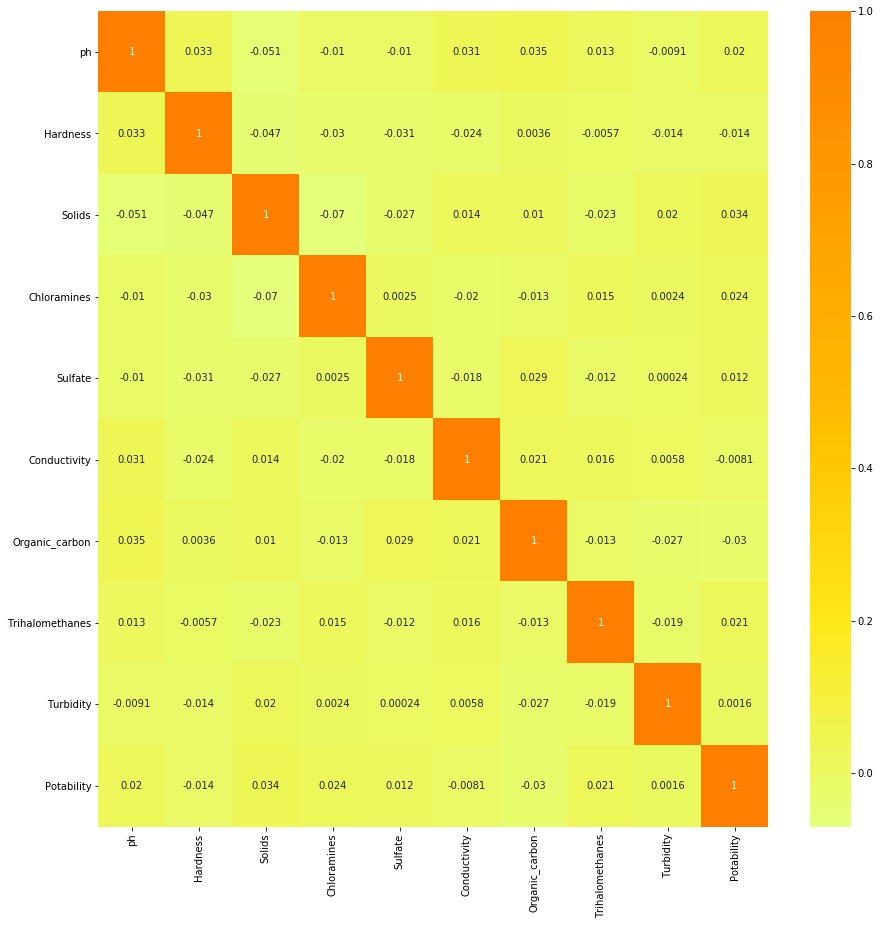

In [68]:
plt.figure(figsize=(15,15))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Wistia')

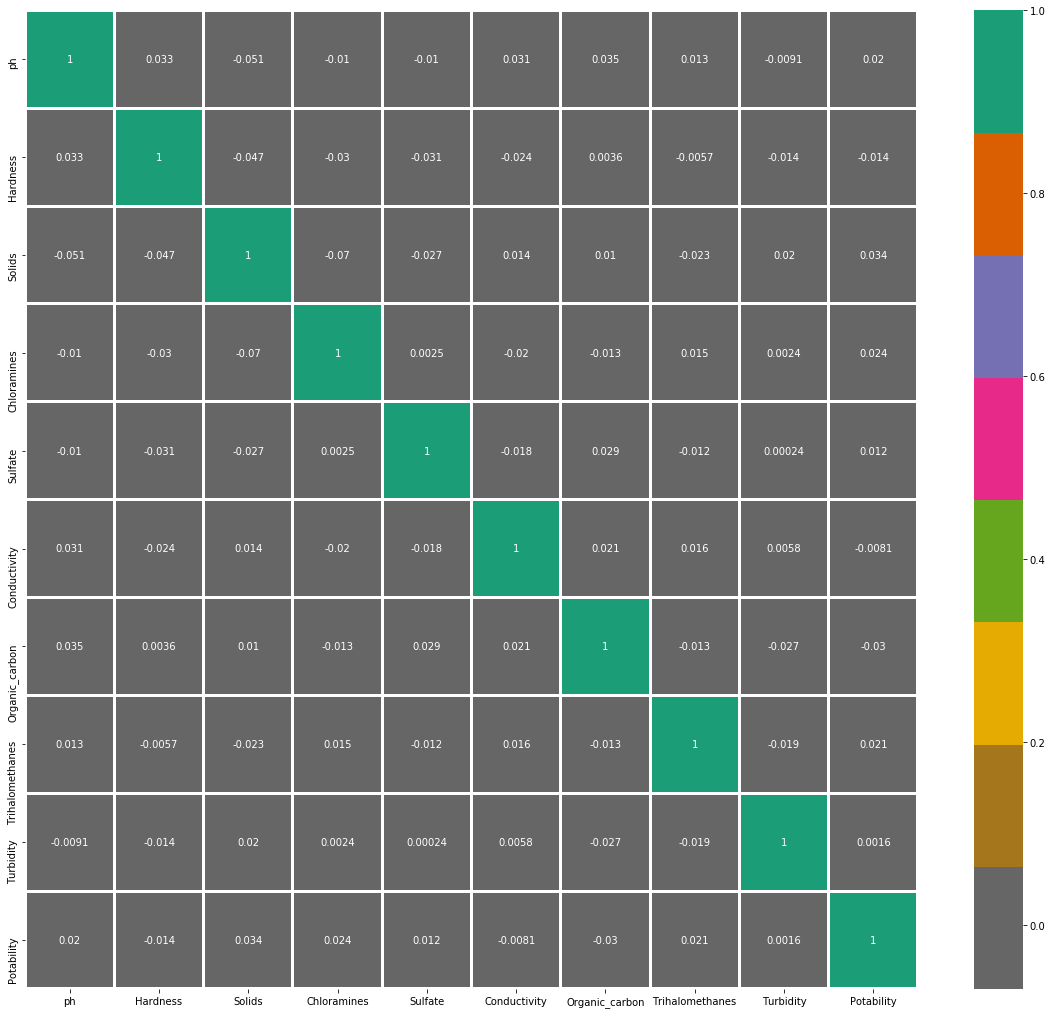

In [69]:
plt.figure(figsize=(20,18))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

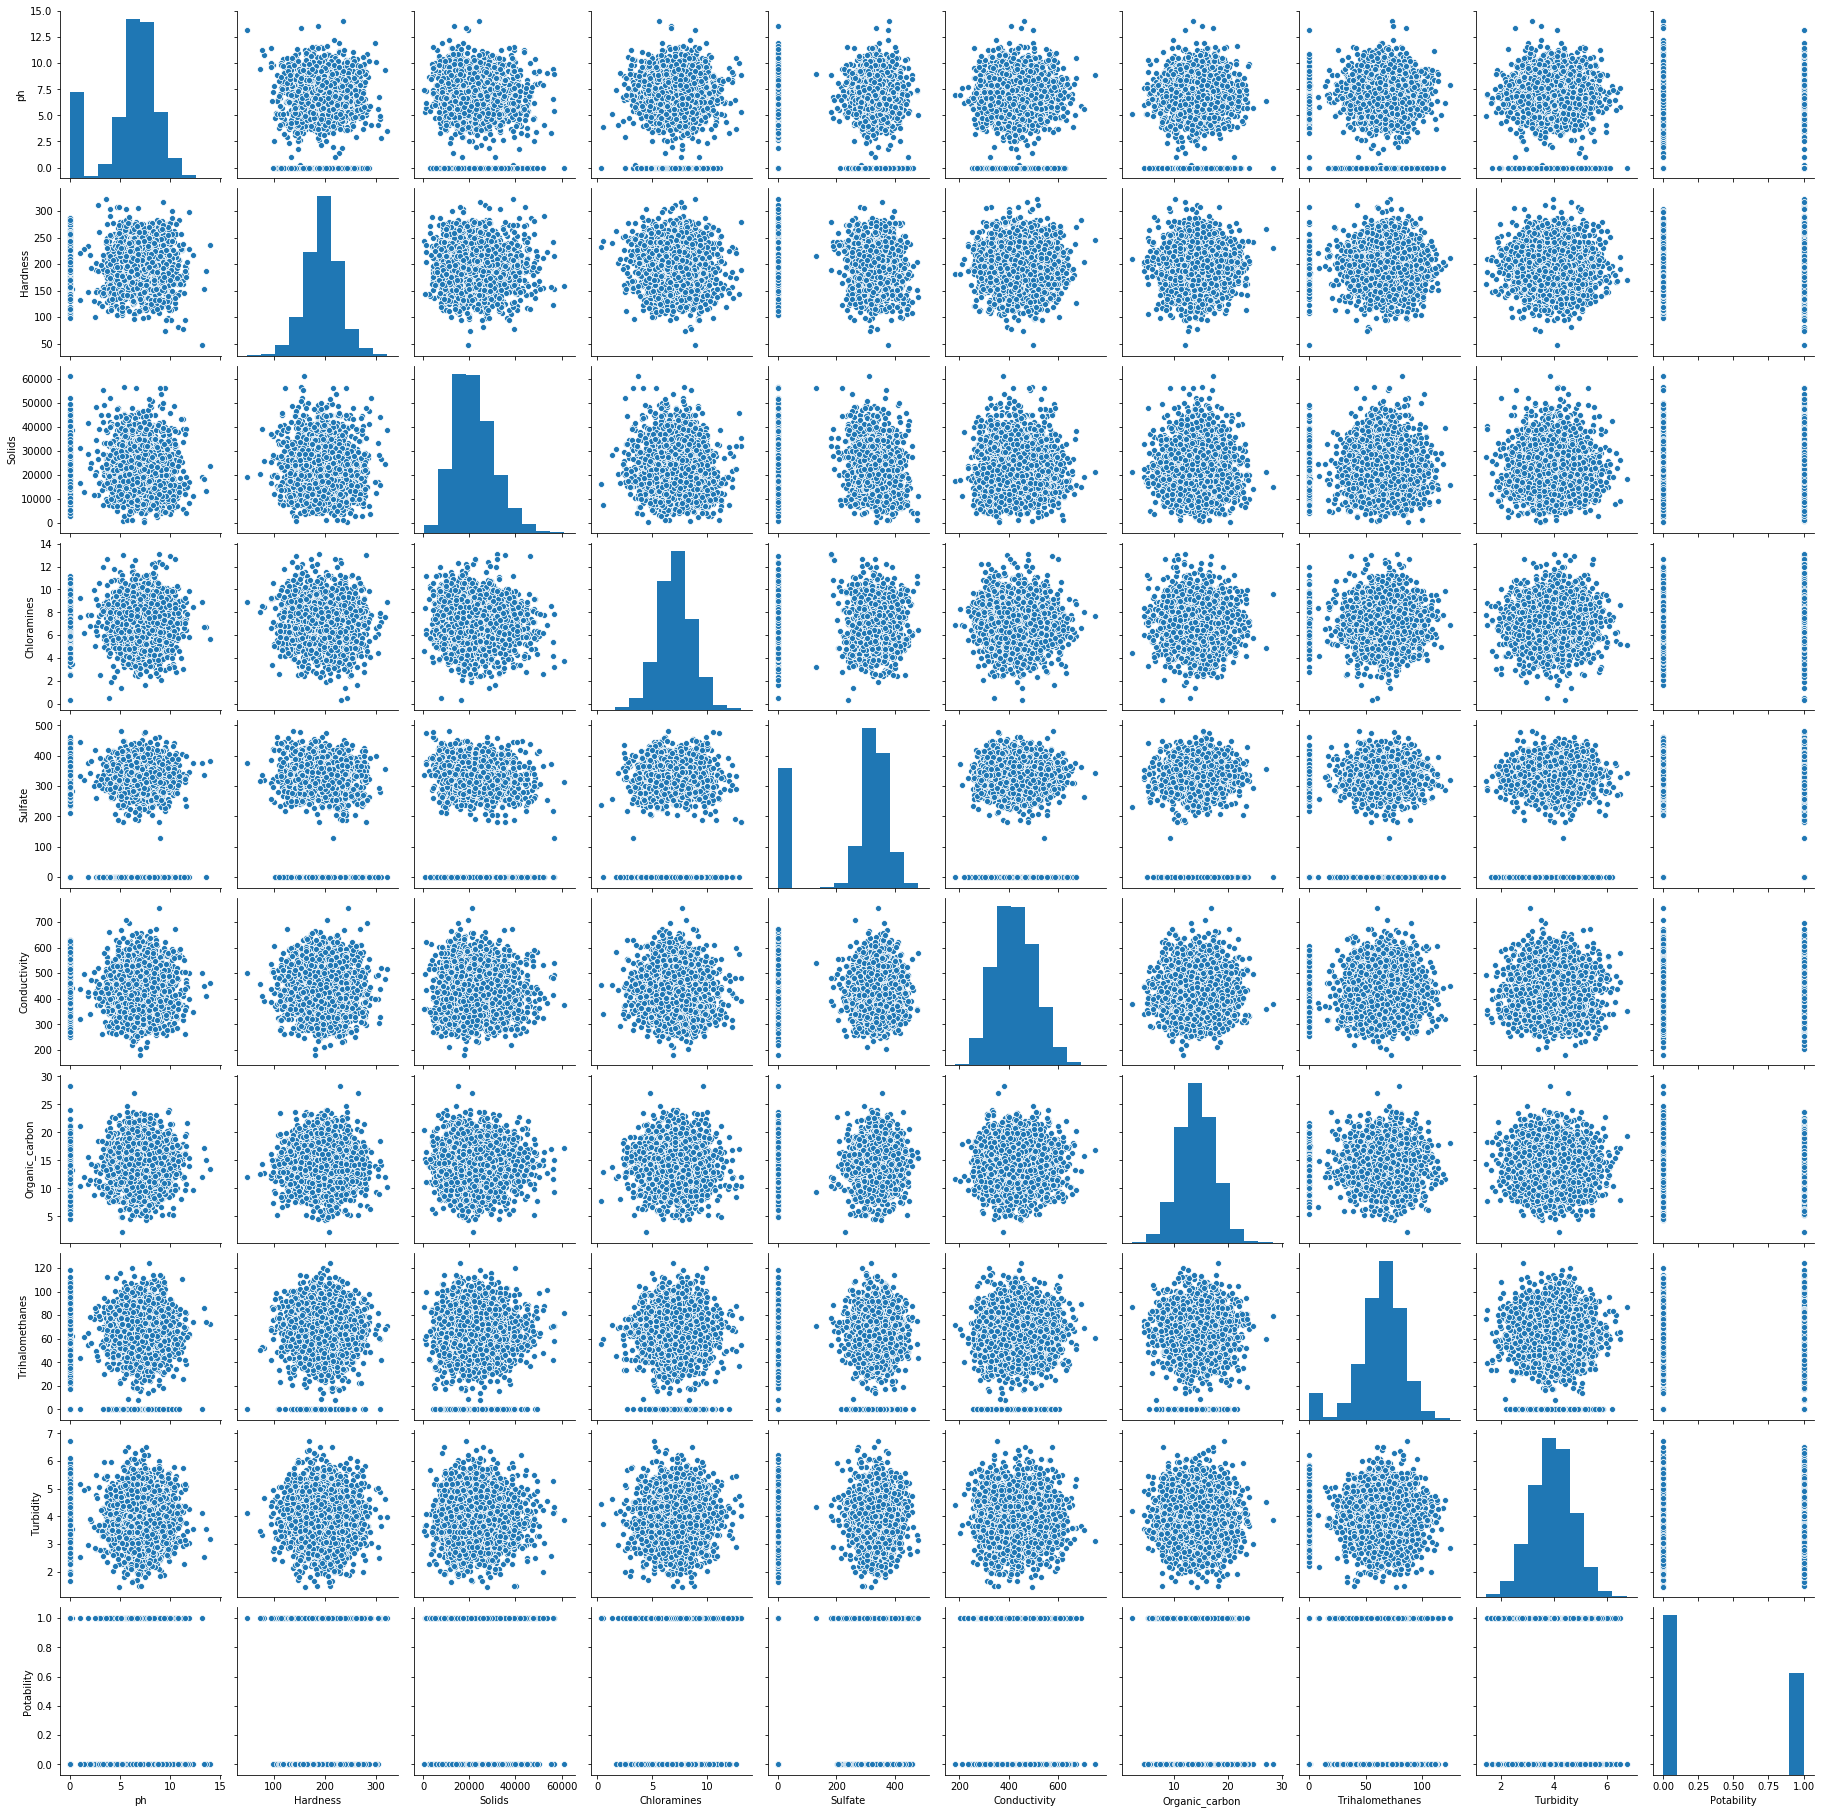

In [70]:
sns.pairplot(df)

In [73]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier', 'LogisticRegression',  'KNeighborsClassifier',
             'AdaBoostClassifier','BaggingClassifier','SVC','GaussianNB','AdaBoostClassifier','GradientBoostingClassifier','ExtraTreesClassifier'],
    'Score': [ accu_tre,accu_l, accu_lo, accu_kne, accu_ada,accu_bag,accu_l,accu_l,accu_ada,accu_grd,accu_etc]
})

models.sort_values(by = 'Score', ascending = False)

Model      Score
2           LogisticRegression  67.682927
10        ExtraTreesClassifier  67.530488
5            BaggingClassifier  64.329268
4           AdaBoostClassifier  63.414634
8           AdaBoostClassifier  63.414634
9   GradientBoostingClassifier  63.414634
1       RandomForestClassifier  62.804878
6                          SVC  62.804878
7                   GaussianNB  62.804878
0       DecisionTreeClassifier  59.146341
3         KNeighborsClassifier  59.146341

In [79]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  0.000000  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246    0.000000    592.885359   
2  8.099124  224.236259  19909.541732     9.275884    0.000000    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [80]:
import sweetviz as sv

In [81]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [82]:
from IPython.display import IFrame

In [83]:
IFrame(src='Analyze.html',width=1000,height=600)

In [84]:
from dataprep.eda import *

  0%|                                                                                         | 0/1452 [00:00<…

DataPrep Report
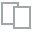
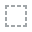
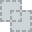
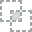
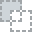
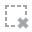
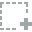
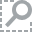
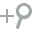
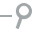
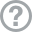
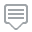
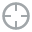
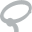
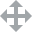
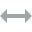
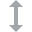
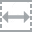
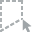
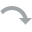
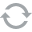
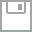
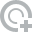
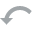
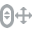
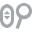
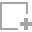
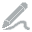
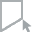
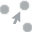
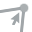
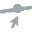

In [85]:
create_report(df)

In [86]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [88]:
man=MinMaxScaler()
feat=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
df[feat]=man.fit_transform(df[feat])
df[feat]

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     0.000000  0.571139  0.336096     0.543891  0.766098      0.669439   
1     0.265434  0.297400  0.300611     0.491839  0.000000      0.719411   
2     0.578509  0.641311  0.321619     0.698543  0.000000      0.414652   
3     0.594055  0.605536  0.356244     0.603314  0.741920      0.317880   
4     0.649445  0.484851  0.289922     0.484900  0.644732      0.379337   
...        ...       ...       ...          ...       ...           ...   
3271  0.333436  0.530482  0.775947     0.533436  0.748286      0.603192   
3272  0.557775  0.530016  0.279263     0.603473  0.000000      0.368912   
3273  0.672822  0.465486  0.539101     0.547807  0.000000      0.438152   
3274  0.366197  0.664407  0.191490     0.465860  0.000000      0.387157   
3275  0.562477  0.535635  0.280484     0.560259  0.000000      0.255266   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0           0.313402         0.701540   0.286091         0.0  
1           0.497319         0.454267   0.576793         0.0  
2           0.562017         0.535646   0.303637         0.0  
3           0.622089         0.809207   0.601015         0.0  
4           0.358555         0.258048   0.496327         0.0  
...              ...              ...        ...         ...  
3271        0.448062         0.537804   0.564534         1.0  
3272        0.678284         0.000000   0.254915         1.0  
3273        0.338662         0.563269   0.349570         1.0  
3274        0.343638         0.624905   0.616120         1.0  
3275        0.534114         0.634665   0.162441         1.0  

[3276 rows x 10 columns]

In [89]:
std=StandardScaler()
nal=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
df[nal]=std.fit_transform(df[nal])
df[nal]


ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0    -2.058835  0.259195 -0.139471     0.112415  0.779002      1.708954   
1    -0.787841 -2.036414 -0.385987    -0.307694 -1.732306      2.062575   
2     0.711270  0.847665 -0.240047     1.360594 -1.732306     -0.094032   
3     0.785709  0.547651  0.000493     0.592008  0.699746     -0.778830   
4     1.050935 -0.464429 -0.460249    -0.363698  0.381159     -0.343939   
...        ...       ...       ...          ...       ...           ...   
3271 -0.462226 -0.081758  2.916188     0.028027  0.720615      1.240155   
3272  0.611991 -0.085667 -0.534295     0.593290 -1.732306     -0.417706   
3273  1.162876 -0.626829  1.270810     0.144017 -1.732306      0.072263   
3274 -0.305352  1.041355 -1.144058    -0.517373 -1.732306     -0.288597   
3275  0.634502 -0.038546 -0.525812     0.244515 -1.732306     -1.221919   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0          -1.180651         1.118394  -1.286298   -0.799775  
1           0.270597        -0.317742   0.684218   -0.799775  
2           0.781117         0.154899  -1.167365   -0.799775  
3           1.255134         1.743711   0.848412   -0.799775  
4          -0.824357        -1.457357   0.138786   -0.799775  
...              ...              ...        ...         ...  
3271       -0.118075         0.167433   0.601124    1.250352  
3272        1.698560        -2.956073  -1.497627    1.250352  
3273       -0.981329         0.315333  -0.856007    1.250352  
3274       -0.942064         0.673305   0.950797    1.250352  
3275        0.560940         0.729990  -2.124459    1.250352  

[3276 rows x 10 columns]